# Titanic Database EDA

# **1․Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For nice plot styling
sns.set(style="whitegrid")

# Load the data (assuming train.csv is in the same folder)
df = pd.read_csv('train.csv')

# View the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**"First, we import the necessary libraries: Pandas for data manipulation and Seaborn/Matplotlib for visualization. After loading the data, we see that we have different types of columns: categorical (Sex, Embarked) and numerical (Age, Fare)."**

# **2. EDA (Exploratory Data Analysis)**

**1. General Information**

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2. Missing Values Visualization**

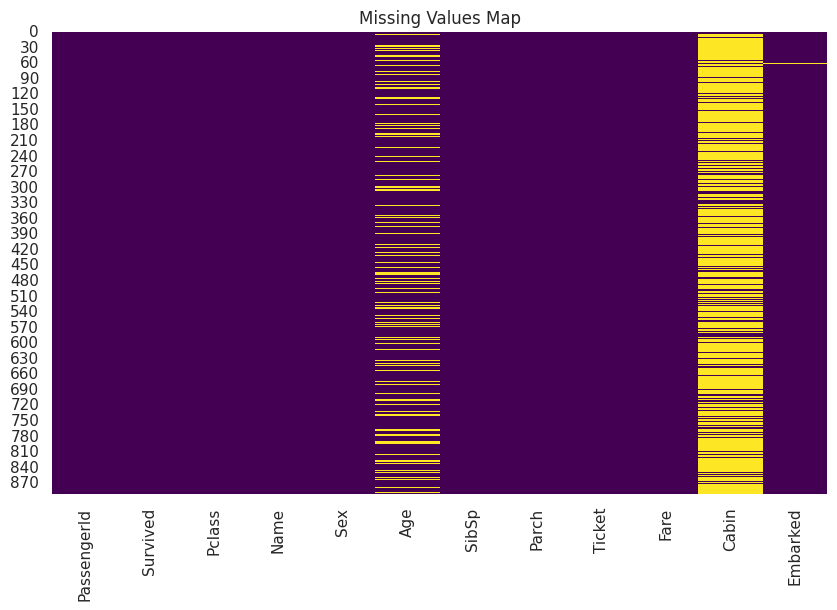

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Map')
plt.show()

**3. Target Variable Analysis (Survived)**

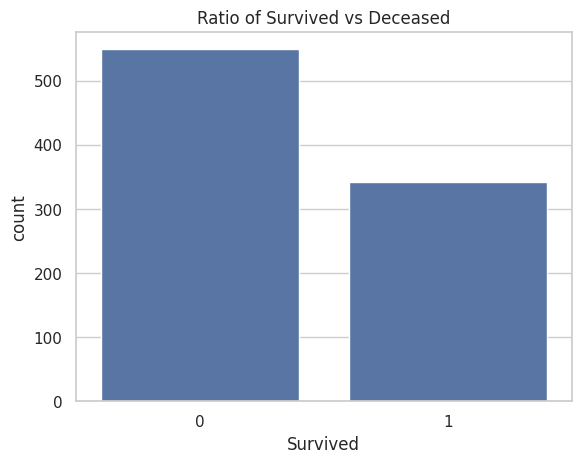

In [4]:
sns.countplot(x='Survived', data=df)
plt.title('Ratio of Survived vs Deceased')
plt.show()

**"We see that there are more deceased (0) than survived (1) in the data. This means our dataset is slightly imbalanced."**

**4. Feature Relations (Sex vs Survived)**

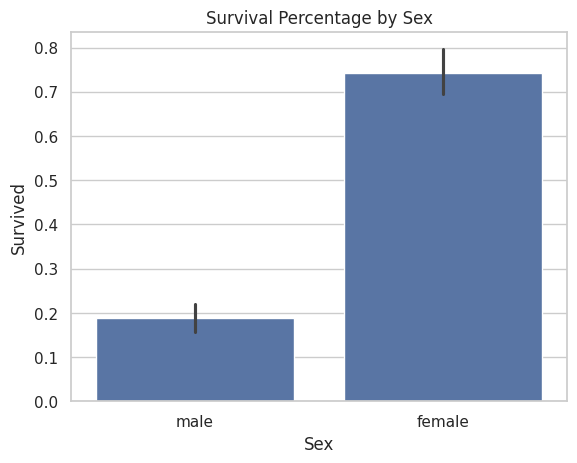

In [5]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Percentage by Sex')
plt.show()

**Woman (1) Man (0) "It is obvious that females had a much higher chance of survival (about 74%) than males. This is critical information for the model."**

**5.Relation with Class (Pclass)**

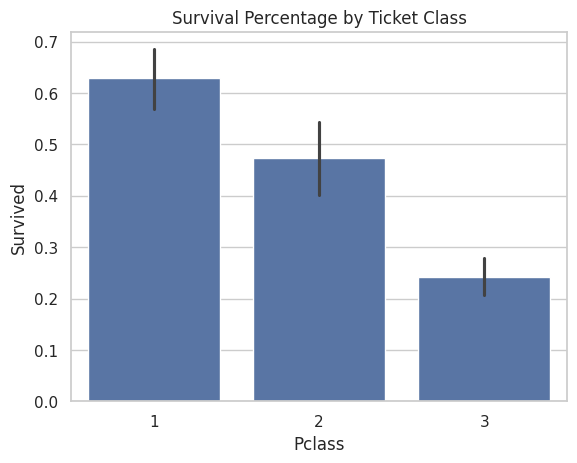

In [6]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Percentage by Ticket Class')
plt.show()

**"1st class passengers had a higher probability of survival compared to 3rd class passengers."**

**3.Data Cleaning**

**Now let's solve the issues we saw in df.info() (Age, Cabin, Embarked).**

**1.** **Embarked** Since only 2 values are missing, we fill them with the most frequent value (mode).

In [7]:
print(df['Embarked'].mode()[0]) # Shows 'S'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

S


**2.** **Age** - Smart Approach Filling with just the mean is wrong. It is better to fill by considering the passenger's class (Pclass).

In [8]:
# Check mean age by class
print(df.groupby('Pclass')['Age'].mean())

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38 # Average for 1st class
        elif Pclass == 2:
            return 29 # Average for 2nd class
        else:
            return 25 # Average for 3rd class
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


/tmp/ipython-input-3812541554.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-3812541554.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


**"When filling in Age, we applied a more accurate method by considering the passenger's social status (Pclass), since wealthier passengers were usually older."**

**3. Cabin** There are many missing values, so we drop this column.

In [9]:
df.drop('Cabin', axis=1, inplace=True)
# Drop columns with missing values
df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

**4.Feature Engineering**

**1. Title** - **From Name column** We can infer status from people's names (Mr, Mrs, Miss, Master). Master, for example, refers to young boys.

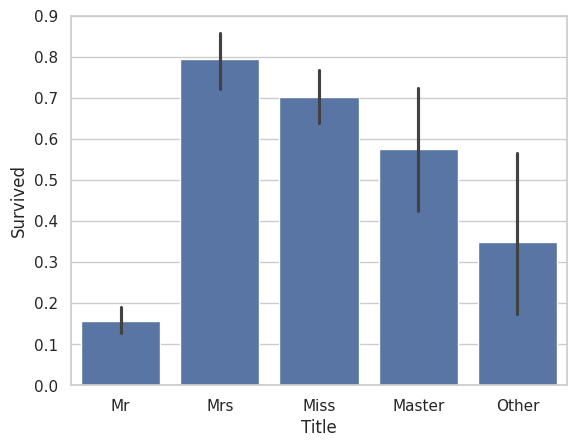

In [10]:
# Extracting titles
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Grouping rare titles under 'Other'
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Now the Name column is not needed
df.drop('Name', axis=1, inplace=True)

# Let's see the result
sns.barplot(x='Title', y='Survived', data=df)
plt.show()

**2. FamilySize** People alone and large families have different chances.

In [11]:
# SibSp = sibling/spouse, Parch = parent/child
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 is the person themselves

**3. IsAlone**

In [12]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

**4. Encoding Categorical Data Machine learning models do not understand text.**

In [13]:
# Sex: Male=0, Female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Converting Embarked and Title to One-Hot Encoding (dummies)
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

**Step 5. Final Check and Conclusions**

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,0,22.0,1,0,7.2500,2,0,False,True,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,1,1,False,True,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,2,0,False,True,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,1,1,False,True,False,True,False,False


**Now we build Correlation Matrix**

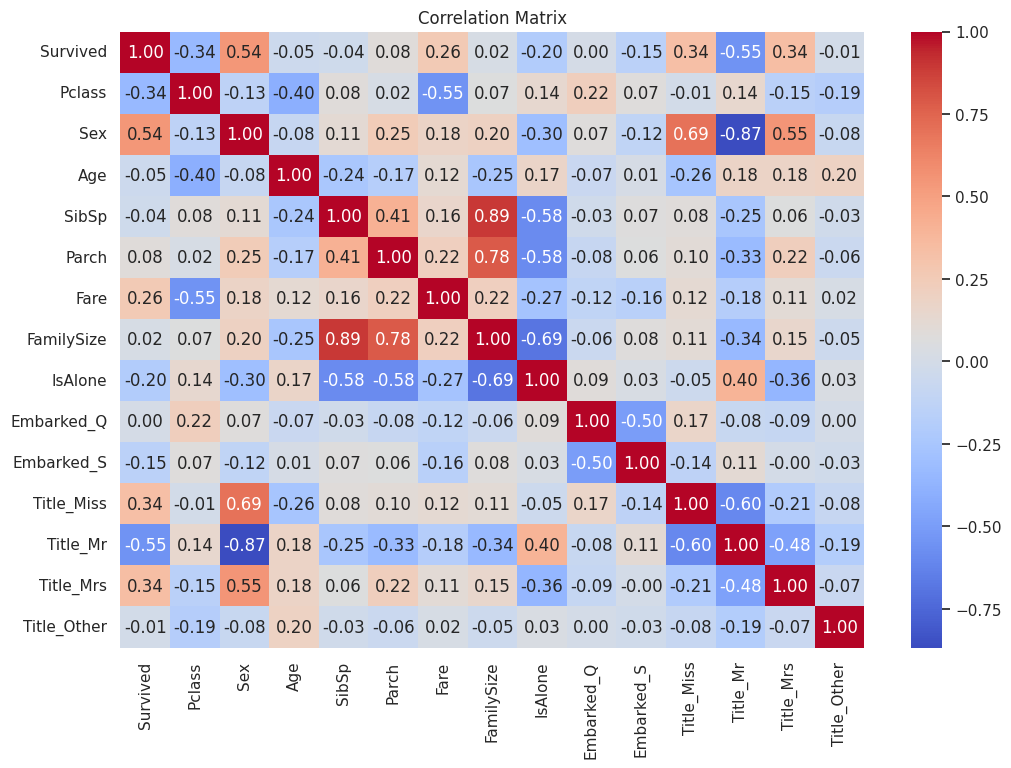

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()